<a href="https://colab.research.google.com/github/melvin-gif/AI-coursework-2025-152384/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Airplane_Crashes_and_Fatalities_Since_1908.csv']))
df.head()

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
#Determine the number of rows and columns in the dataset.
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5268
Number of columns: 13


In [ ]:
#Display the last 75 rows in the dataset.
display_rows = df.tail(75)
print(display_rows)

            Date   Time                                           Location  \
5193  03/15/2008  08:15                                     Nbagu, Nigeria   
5194  04/03/2008  11:00                                     Lawa, Suriname   
5195  04/09/2008  23:27                                Bundeena, Australia   
5196  04/11/2008  22:15                                 Chrisinau, Moldova   
5197  04/15/2008  14:30                                        Goma, Congo   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
5193        T

In [ ]:
#Each column except the first one has some missing data. For each column, namethe most appropriate method for treating the missing data.
#Justify your choices.

In [ ]:
#Create a new dataframe from the raw/uncleaned data
#called‘fatality_locations’ with the following columns: ‘Date’,‘Location’, ‘Aboard’, ‘Fatalities’
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
print(fatality_locations)

            Date                                           Location  Aboard  \
0     09/17/1908                                Fort Myer, Virginia     2.0   
1     07/12/1912                            AtlantiCity, New Jersey     5.0   
2     08/06/1913                 Victoria, British Columbia, Canada     1.0   
3     09/09/1913                                 Over the North Sea    20.0   
4     10/17/1913                         Near Johannisthal, Germany    30.0   
...          ...                                                ...     ...   
5263  05/20/2009                             Near Madiun, Indonesia   112.0   
5264  05/26/2009                  Near Isiro, DemocratiRepubliCongo     4.0   
5265  06/01/2009  AtlantiOcean, 570 miles northeast of Natal, Br...   228.0   
5266  06/07/2009       Near Port Hope Simpson, Newfoundland, Canada     1.0   
5267  06/08/2009                  State of Arunachal Pradesh, India    13.0   

      Fatalities  
0            1.0  
1            

In [1]:
#Determine the date of the highest number of recorded fatalities from this newdataframe.
highest_fatalities = fatality_locations.sort_values(by='Fatalities', ascending=False).iloc[0]
date_of_highest_fatalities = highest_fatalities['Date']
num_of_highest_fatalities = highest_fatalities['Fatalities']
print(f"The date with the highest number of recorded fatalities is {date_of_highest_fatalities} with {int(num_of_highest_fatalities)} fatalities.")

NameError: name 'fatality_locations' is not defined

In [ ]:
#Create a new dataframe from the raw/uncleaned data
#called‘fatality_locations’ with the following columns: ‘Date’,‘Location’, ‘Aboard’, ‘Fatalities’
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
print(fatality_locations.head())

In [ ]:
#Determine the date of the highest number of recorded fatalities from this newdataframe.
highest_fatalities = fatality_locations.sort_values(by='Fatalities', ascending=False).iloc[0]
date_of_highest_fatalities = highest_fatalities['Date']
num_of_highest_fatalities = highest_fatalities['Fatalities']
print(f"The date with the highest number of recorded fatalities is {date_of_highest_fatalities} with {int(num_of_highest_fatalities)} fatalities.")

In [ ]:
#Compare the number of passengers aboard to the number of fatalities per crash.
#Arethere any recorded crashes where there were no fatalities? If so, how many?
fatality_locations['Aboard'] = pd.to_numeric(fatality_locations['Aboard'], errors='coerce').fillna(0)
fatality_locations['Fatalities'] = pd.to_numeric(fatality_locations['Fatalities'], errors='coerce').fillna(0)
fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']
crashes_with_no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0].shape[0]
print("Comparison (Aboard vs. Fatalities):\n", fatality_locations[['Aboard', 'Fatalities']].head())
print("\nNumber of recorded crashes with no fatalities:", crashes_with_no_fatalities)

In [ ]:
#n the ‘fatality_locations’ dataframe, the location column has data items represented as ‘Region, U.S. State/Country’.
#Split this column to have two columns of regions and states/countries.

In [ ]:
#Order the dataframe by the number of fatalities from highest to lowest and select the first 100.

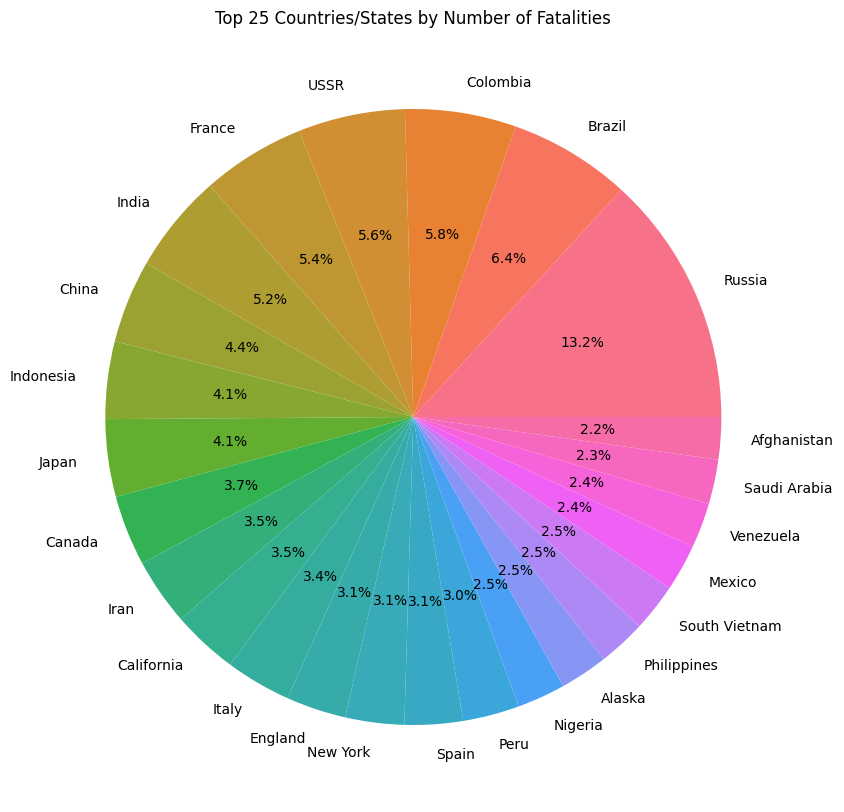

In [ ]:
#Generate a pie chart that shows the distribution of the top 25 number of fatalities per country/U.S. State.
 #[Hint: charts can be generated from the seaborn library]
fatality_locations['Country'] = fatality_locations['Location'].str.split(',').str[-1].str.strip()
top_25 = fatality_locations.groupby('Country')['Fatalities'].sum().nlargest(25)
plt.figure(figsize=(12, 10))
plt.pie(top_25.values, labels=top_25.index, autopct='%1.1f%%',
        colors=sns.color_palette('husl', 25))
plt.title('Top 25 Countries/States by Number of Fatalities')
plt.show()